1. Open image using PIL library

In [4]:
# Imports PIL module  
from PIL import Image 
  
# open method used to open different extension image file 
im = Image.open(r"C:\Users\user\Desktop\Training OCR\Data\example.jpg")  

# This method will show image in any image viewer  
im.show()


Image Processing - Invert Image

In [5]:
# Import OpenCV library
import cv2
# Import pyplot module from matplotlib library
from matplotlib import pyplot as plt

# Load image using file path
img = cv2.imread(r"C:\Users\user\Desktop\Training OCR\Data\example.jpg")

#Show image using OpenCV
cv2.imshow("Example", img)

#Invert image
inverted_image = cv2.bitwise_not(img)
cv2.imshow("Inverted Image", inverted_image)



# Wait for a key press indefinitely or for a specified amount of time in milliseconds
cv2.waitKey(0)


-1

Image Processing - Scaling

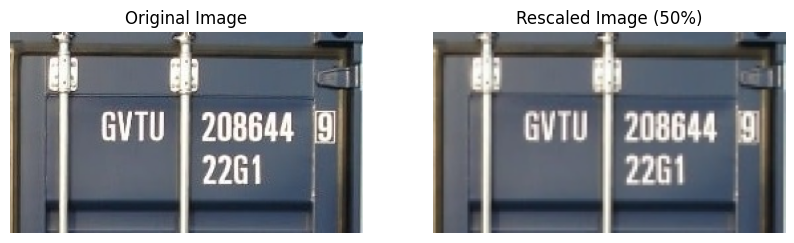

In [6]:
import cv2
from matplotlib import pyplot as plt

# Load image using file path
img_path = r"C:\Users\user\Desktop\Training OCR\Data\example.jpg"
img = cv2.imread(img_path)

# Rescale the image by 50% (scale_percent = 50)
scale_percent = 50
width = int(img.shape[1] * scale_percent / 100)
height = int(img.shape[0] * scale_percent / 100)
rescaled_img = cv2.resize(img, (width, height), interpolation=cv2.INTER_AREA)

# Display the original and rescaled images using matplotlib
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(122)
plt.title(f'Rescaled Image ({scale_percent}%)')
plt.imshow(cv2.cvtColor(rescaled_img, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.show()


Image Processing - Grayscaling

In [7]:
import cv2 
  
# Load the input image 
image = cv2.imread(r"C:\Users\user\Desktop\Training OCR\Data\example.jpg") 
cv2.imshow('Original', image) 
  
# Use the cvtColor() function to grayscale the image 
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
cv2.imshow('Grayscale', gray_image) 

cv2.waitKey(0)

-1

In [8]:
import cv2 
  
# Use the second argument or (flag value) zero 
# that specifies the image is to be read in grayscale mode 
image = cv2.imread(r"C:\Users\user\Desktop\Training OCR\Data\example.jpg",0) 
  
cv2.imshow('Grayscale Image', image) 
cv2.waitKey(0) 

-1

Preprocessing - Binarization

In [9]:
import cv2
from matplotlib import pyplot as plt

# Load image using file path
img_path = r"C:\Users\user\Desktop\Training OCR\Data\example.jpg"
img = cv2.imread(img_path)  # Load image in grayscale
cv2.imshow("Example", img)

# Apply Canny Edge Detection
canny_image = cv2.Canny(img, 100, 200)
cv2.imshow("Canny", canny_image)

# Wait for a key press indefinitely or for a specified amount of time in milliseconds
cv2.waitKey(0)

-1

Image Processing - Binarization

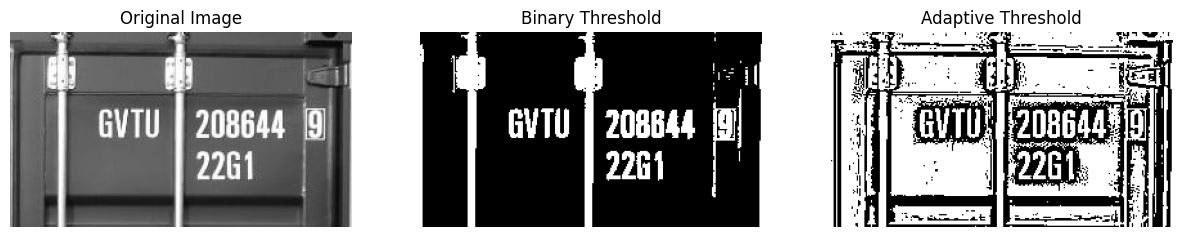

In [10]:
import cv2
from matplotlib import pyplot as plt

# Load image using file path
img_path = r"C:\Users\user\Desktop\Training OCR\Data\example.jpg"
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Load image in grayscale

# Apply simple binary thresholding
_, thresh_binary = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY)

# Apply adaptive thresholding
thresh_adaptive = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

# Display the original, binary threshold, and adaptive threshold images using matplotlib
plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.title('Original Image')
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(132)
plt.title('Binary Threshold')
plt.imshow(thresh_binary, cmap='gray')
plt.axis('off')

plt.subplot(133)
plt.title('Adaptive Threshold')
plt.imshow(thresh_adaptive, cmap='gray')
plt.axis('off')

plt.show()

Image Processing - Noise Removal

In [11]:
import cv2

img_path = r"C:\Users\user\Desktop\Training OCR\Data\example.jpg"
img = cv2.imread(img_path)  # Load image
#Remove noise
noise_removal = cv2.fastNlMeansDenoisingColored(img,None,10,10,7,21)
cv2.imshow("Original", img)
cv2.imshow("Noise removel", noise_removal)
cv2.waitKey(0)

-1

Image Processing - Erosion/Dilation

In [12]:
import cv2 
import numpy as np 
  
# Reading the input image 
img = cv2.imread(r"C:\Users\user\Desktop\Training OCR\Data\example.jpg", 0) 
  
# Taking a matrix of size 5 as the kernel 
kernel = np.ones((7, 7), np.uint8) 
  
# Image erosion 
img_erosion = cv2.erode(img, kernel, iterations=1) 
#Image dilation
img_dilation = cv2.dilate(img, kernel, iterations=1) 
  
cv2.imshow('Input', img) 
cv2.imshow('Erosion', img_erosion) 
cv2.imshow('Dilation', img_dilation) 
  
cv2.waitKey(0) 

-1

Image processing - Manual rotation

In [13]:
import cv2
from matplotlib import pyplot as plt

def rotate_image(image, angle):
    (h, w) = image.shape[:2]
    center = (w / 2, h / 2)
    # Rotate the image by the specified angle
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated_image = cv2.warpAffine(image, M, (w, h))
    return rotated_image

# Load image using file path
img_path = r"C:\Users\user\Desktop\Training OCR\Data\example1.jpg"
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Load image in grayscale

# Rotate the image by 15 degrees
rotated_img = rotate_image(img, 15)

#Show images using OpenCV
cv2.imshow("Original image", img)
cv2.imshow("Rotated image", rotated_img)

cv2.waitKey(0) 


# # Display the original and rotated images using matplotlib
# plt.figure(figsize=(10, 5))

# plt.subplot(121)
# plt.title('Original Image')
# plt.imshow(img, cmap='gray')
# plt.axis('off')

# plt.subplot(122)
# plt.title('Rotated Image')
# plt.imshow(rotated_img, cmap='gray')
# plt.axis('off')

# plt.show()

-1

Image processing - Automated rotation

In [15]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def deskew_image(image):
    # Convert to binary image
    _, binary = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY_INV)
    
    # Find contours of the binary image
    contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Get the minimum area rectangle for each contour
    rects = [cv2.minAreaRect(contour) for contour in contours]
    
    # Calculate the angle of rotation from the rectangle with the largest area
    largest_rect = max(rects, key=lambda r: r[1][0] * r[1][1])
    angle = largest_rect[-1]
    
    # Correct the angle
    if angle < -45:
        angle = 90 + angle

    # Rotate the image to deskew it
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    deskewed_image = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)

    return deskewed_image

# Load image using file path
img_path = r"C:\Users\user\Desktop\Training OCR\Data\example1.jpg"
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Load image in grayscale

# Deskew the image
deskewed_img = deskew_image(img)

#Show image using OpenCV
cv2.imshow("Original image", img)
cv2.imshow("Deskewed image", deskewed_img)
cv2.waitKey(0)

# # Display the original and deskewed images using matplotlib
# plt.figure(figsize=(10, 5))

# plt.subplot(121)
# plt.title('Original Image')
# plt.imshow(img, cmap='gray')
# plt.axis('off')

# plt.subplot(122)
# plt.title('Deskewed Image')
# plt.imshow(deskewed_img, cmap='gray')
# plt.axis('off')

# plt.show()


-1

Segmentation

In [17]:
import cv2
import numpy as np

# Step 1: Preprocessing
def preprocess_image(image_path):
    # Read the image
    image = cv2.imread(image_path)
    
    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Apply GaussianBlur to remove noise
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    
    # Apply thresholding to get a binary image
    _, binary = cv2.threshold(blurred, 128, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)
    
    return binary, image

# Step 2: Line Segmentation
def segment_lines(binary_image):
    # Calculate horizontal projection profile
    horizontal_projection = np.sum(binary_image, axis=1)
    
    # Detect line segments based on the projection profile
    lines = []
    in_line = False
    start = 0
    for i, value in enumerate(horizontal_projection):
        if value > 0 and not in_line:
            in_line = True
            start = i
        elif value == 0 and in_line:
            in_line = False
            end = i
            lines.append((start, end))
    
    line_images = [binary_image[start:end, :] for start, end in lines]
    
    return line_images, lines

# Step 3: Word Segmentation with Morphological Operations
def segment_words(line_image):
    # Use morphological operations to close gaps between characters
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (20, 1))  # Adjust kernel size as needed
    dilated = cv2.dilate(line_image, kernel, iterations=1)
    
    # Find contours to identify words
    contours, _ = cv2.findContours(dilated, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    words = []
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        words.append((x, y, w, h))
    
    words = sorted(words, key=lambda b: b[0])  # Sort by x coordinate
    
    word_images = [line_image[:, x:x+w] for x, y, w, h in words]
    
    return word_images, words

# Step 4: Character Segmentation
def segment_characters(word_image):
    # Use connected components to segment characters
    num_labels, labels, stats, _ = cv2.connectedComponentsWithStats(word_image, connectivity=8)
    
    character_images = []
    characters = []
    for i in range(1, num_labels):  # Skip the background label 0
        x, y, w, h, area = stats[i]
        character_images.append(word_image[y:y+h, x:x+w])
        characters.append((x, y, w, h))
    
    return character_images, characters

# Display results with bounding boxes
def display_results(image_path):
    binary_image, original_image = preprocess_image(image_path)
    
    # Clone the original image for different segmentation displays
    image_with_lines = original_image.copy()
    image_with_words = original_image.copy()
    image_with_characters = original_image.copy()
    
    # Segment lines
    line_images, lines = segment_lines(binary_image)
    
    for i, (start, end) in enumerate(lines):
        cv2.rectangle(image_with_lines, (0, start), (original_image.shape[1], end), (0, 255, 0), 2)
        line_image = line_images[i]
        
        # Segment words in each line
        word_images, words = segment_words(line_image)
        
        for j, (x, y, w, h) in enumerate(words):
            cv2.rectangle(image_with_words, (x, start + y), (x + w, start + y + h), (255, 0, 0), 2)
            word_image = word_images[j]
            
            # Segment characters in each word
            character_images, characters = segment_characters(word_image)
            
            for k, (cx, cy, cw, ch) in enumerate(characters):
                cv2.rectangle(image_with_characters, (x + cx, start + y + cy), (x + cx + cw, start + y + cy + ch), (0, 0, 255), 2)
    
    # Display the images with bounding boxes
    cv2.imshow('Lines Segmented', image_with_lines)
    cv2.imshow('Words Segmented', image_with_words)
    cv2.imshow('Characters Segmented', image_with_characters)
    
    # Save the images with bounding boxes
    cv2.imwrite('lines_segmented.png', image_with_lines)
    cv2.imwrite('words_segmented.png', image_with_words)
    cv2.imwrite('characters_segmented.png', image_with_characters)
    
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# Run the OCR segmentation process and display results
display_results(r"C:\Users\user\Desktop\Training OCR\Data\example2.png")


Text recognition using Pytesseract

In [23]:
import pytesseract
import cv2

# Set the path to the Tesseract executable (adjust as needed)
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

# Load the image using OpenCV
image_path = r"C:\Users\user\Desktop\Training OCR\Data\example2.png"
image = cv2.imread(image_path)

# Display the loaded image
cv2.imshow("Image", image)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Perform OCR using Tesseract
text = pytesseract.image_to_string(gray)

# Print the recognized text
print("Recognized Text:")
print(text)


Recognized Text:
| am curious about
area-filling text
rendering options

